# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../../data/Part01'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../../data/Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [ ]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = ['float','int']

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))]) # 檢查欄位的 dtype, 只選取true的欄位
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns %d " % len(numeric_columns))

In [51]:
all_data[0]

array([ 1.73816121, -0.52313506,  1.25209043, -0.76485669, -1.36631245,
        0.60016094, -0.20323777, -0.07745541,  0.67068444, -0.38739766,
       -0.56964648, -0.28610967,  0.32709357, -1.16399462, -0.22091196,
       -0.96249819,  0.60063858,  0.95649038,  0.13462251,  1.20771983,
       -0.36979222, -0.67334189, -0.52819264,  1.11074245,  0.1242834 ,
       -1.66278837,  0.89705638, -0.37145333,  1.50387061, -0.82645504,
        0.90171303,  0.37333002,  0.80608221, -0.19429848, -0.09662905,
        1.34314023,  0.45912492,  0.33414385, -1.57145287,  0.73397059,
        1.86966942,  1.15092426, -1.37226775,  0.26034661, -0.11046228,
        0.4202217 , -0.92764244,  0.04373249, -1.37162671,  1.32206407,
        1.93132453, -2.23460214,  0.78412798, -0.11889523,  0.8736253 ,
        1.35235944, -0.78629972,  2.463011  , -0.41557116,  0.21126058,
       -0.76529489, -0.4460438 ,  0.59968373,  1.93460839,  0.65362555,
       -0.79567906, -0.26994551,  0.55575342, -2.13768751,  0.33

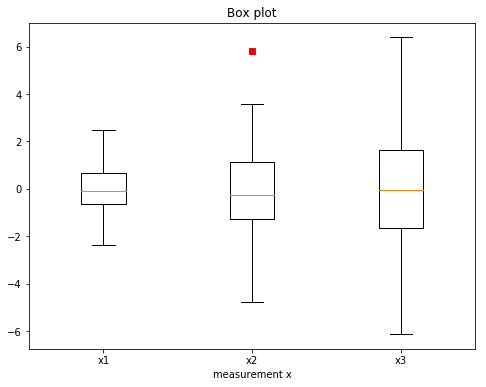

In [48]:
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]
 
fig = plt.figure(figsize=(8,6))
 
plt.boxplot(all_data,
            notch=False, # box instead of notch shape
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent
 
plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
plt.xlabel('measurement x')
t = plt.title('Box plot')
plt.show()

In [53]:
list(app_train[numeric_columns[0]])

[202500.0,
 270000.0,
 67500.0,
 135000.0,
 121500.0,
 99000.0,
 171000.0,
 360000.0,
 112500.0,
 135000.0,
 112500.0,
 38419.155,
 67500.0,
 225000.0,
 189000.0,
 157500.0,
 108000.0,
 81000.0,
 112500.0,
 90000.0,
 135000.0,
 202500.0,
 450000.0,
 83250.0,
 135000.0,
 90000.0,
 112500.0,
 112500.0,
 270000.0,
 90000.0,
 292500.0,
 112500.0,
 90000.0,
 360000.0,
 135000.0,
 112500.0,
 198000.0,
 121500.0,
 99000.0,
 180000.0,
 202500.0,
 202500.0,
 135000.0,
 108000.0,
 202500.0,
 90000.0,
 202500.0,
 99000.0,
 130500.0,
 360000.0,
 54000.0,
 540000.0,
 76500.0,
 225000.0,
 81000.0,
 180000.0,
 67500.0,
 81000.0,
 360000.0,
 540000.0,
 180000.0,
 180000.0,
 324000.0,
 112500.0,
 180000.0,
 180000.0,
 180000.0,
 225000.0,
 157500.0,
 180000.0,
 180000.0,
 103500.0,
 225000.0,
 157500.0,
 135000.0,
 202500.0,
 112500.0,
 135000.0,
 94500.0,
 108000.0,
 67500.0,
 81000.0,
 157500.0,
 225000.0,
 360000.0,
 202500.0,
 202500.0,
 126000.0,
 72000.0,
 90000.0,
 193500.0,
 171000.0,
 135000.0

ValueError: Dimensions of labels and X must be compatible

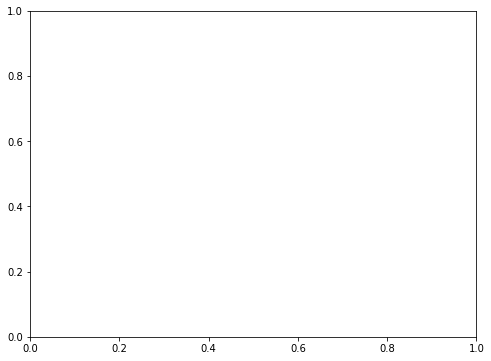

In [57]:
# 檢視這些欄位的數值範圍
# for col in numeric_columns:
#     """
#     Your CODE HERE, make the box plot
#     """
    
#     all_data = col

#     fig = plt.figure(figsize=(8,6))

#     plt.boxplot(all_data,
#                 notch=False, # box instead of notch shape
#                 sym='rs',    # red squares for outliers
#                 vert=True)   # vertical box aligmnent

#     plt.xticks([y+1 for y in range(len(all_data))], ['x1', 'x2', 'x3'])
#     plt.xlabel('measurement x')
#     t = plt.title('Box plot')
    
#     plt.show()

# for col in numeric_columns:
all_data = np.array([list(app_train[numeric_columns[0]])])

fig = plt.figure(figsize=(8,6))

plt.boxplot(all_data, labels=('最低價'))


plt.xlabel('measurement x')
t = plt.title('Box plot')

plt.show()

In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [ ]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [ ]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [ ]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()